<a href="https://colab.research.google.com/github/amardeep-H/Machine_Learning_and_Deep_Learning/blob/master/ANN_on_churn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello")

hello


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6799962124059028946, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4655797693319136922
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
!cat  /proc/meminfo

MemTotal:       13305368 kB
MemFree:         9455856 kB
MemAvailable:   12060136 kB
Buffers:           87356 kB
Cached:          2511268 kB
SwapCached:            0 kB
Active:          1276880 kB
Inactive:        2183264 kB
Active(anon):     675196 kB
Inactive(anon):    10672 kB
Active(file):     601684 kB
Inactive(file):  2172592 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               144 kB
Writeback:             0 kB
AnonPages:        861428 kB
Mapped:           599584 kB
Shmem:             11408 kB
KReclaimable:     142956 kB
Slab:             200040 kB
SReclaimable:     142956 kB
SUnreclaim:        57084 kB
KernelStack:        4960 kB
PageTables:         8508 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6652684 kB
Committed_AS:    3805080 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       51148 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
!cat  /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!pip install -q keras

In [7]:
import pandas as pd

In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [18]:
dataset = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")


In [19]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [20]:
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [21]:
X = pd.concat([X, geography, gender],axis=1)

In [22]:
X = X.drop(["Geography", "Gender"], axis = 1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [26]:
classifier = Sequential()


In [31]:
classifier.add(Dense(units =6, kernel_initializer='he_normal', activation = 'relu', input_dim = 11))

In [34]:
classifier.add(Dense(units =6, kernel_initializer = 'he_normal', activation='relu'))

In [35]:
classifier.add(Dense(units = 1,kernel_initializer="glorot_uniform", activation ='sigmoid' ))

In [37]:
classifier.compile(optimizer="Adamax", loss="binary_crossentropy", metrics = ['accuracy'])

In [39]:
model_history = classifier.fit(X_train, y_train, validation_split= 0.33, batch_size=10, epochs=100 )

Epoch 1/100
536/536 [==============================] - 16s 4ms/step - loss: 0.5661 - accuracy: 0.7783 - val_loss: 0.4960 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4886 - accuracy: 0.7991 - val_loss: 0.4829 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4708 - accuracy: 0.7996 - val_loss: 0.4697 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4535 - accuracy: 0.7979 - val_loss: 0.4616 - val_accuracy: 0.7978
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4439 - accuracy: 0.8059 - val_loss: 0.4569 - val_accuracy: 0.7986
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4353 - accuracy: 0.8151 - val_loss: 0.4533 - val_accuracy: 0.7986
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4347 - accuracy: 0.8153 - val_loss: 0.4500 - val_accuracy: 0.803

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


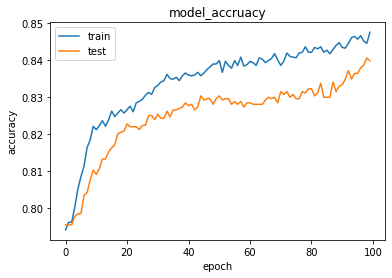

In [48]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accruacy')
plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1518,   77],
       [ 237,  168]])

In [50]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [51]:
score

0.843